In [1]:
import pandas as pd
import networkx as nx
import numpy as np

from src.load import load_financial_transfer_networks
from src.plotting import plot_english_league_season_fee

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff250c8fc10>,
      dtype=object)

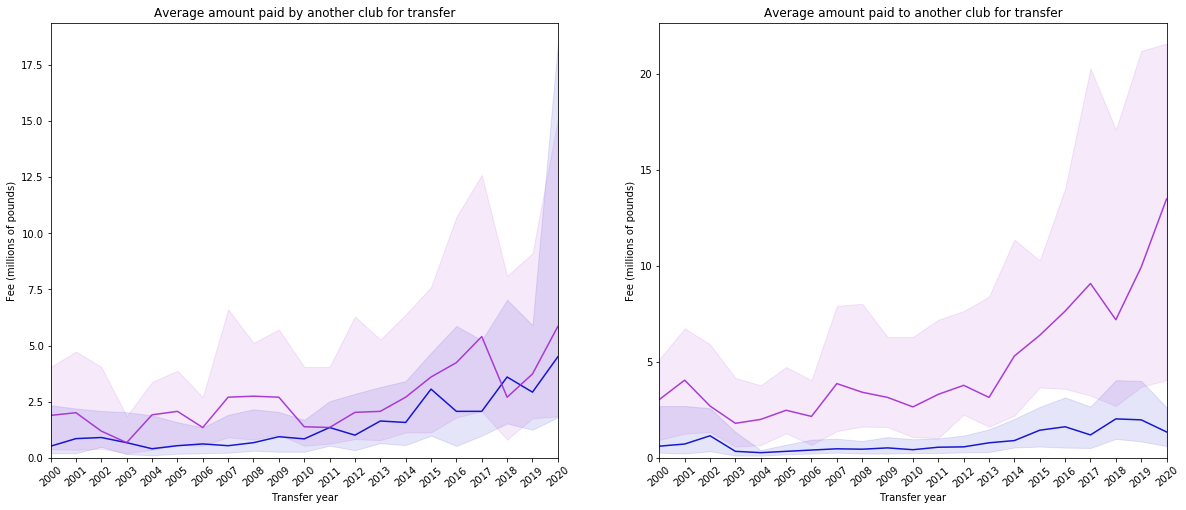

In [2]:
plot_english_league_season_fee(include_championship=True)

In [2]:
g = nx.MultiDiGraph()
g.add_edge(1, 2, fee=12)
g.add_edge(2, 3, fee=21)
g.add_edge(1, 2, fee=100)
g.add_edge(1, 3, fee=69)
g.add_edge(4, 1, fee=12)

0

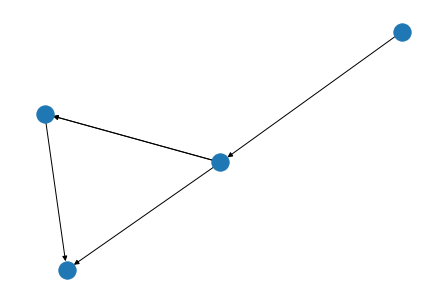

In [3]:
nx.draw(g)

In [4]:
dict(g[1])

{2: AtlasView({0: {'fee': 12}, 1: {'fee': 100}}),
 3: AtlasView({0: {'fee': 69}})}

In [5]:
total_out = 0
for v, edges in dict(g[1]).items():
    for edge_num, data in dict(edges).items():
        total_out += data['fee']
total_out

181

In [6]:
total_in = 0
dict(g.edges)

{(1, 2, 0): {'fee': 12},
 (1, 2, 1): {'fee': 100},
 (1, 3, 0): {'fee': 69},
 (2, 3, 0): {'fee': 21},
 (4, 1, 0): {'fee': 12}}

In [7]:
total = 0
for u, v, data in g.edges():
    

SyntaxError: unexpected EOF while parsing (<ipython-input-7-40cbdb2697e9>, line 3)

In [8]:
prem = load_financial_transfer_networks(2016, 2016)[2016]

In [20]:
ins = []
outs = []

for u, v, data in prem.G.edges(data=True):
    if data[prem.edge_key] == 0:
        continue
    
    if u in prem.league_clubs:
        outs.append(data[prem.edge_key])
    if v in prem.league_clubs: 
        ins.append(data[prem.edge_key])
        
print(np.mean(ins))
print(np.mean(outs))

print(np.std(ins))
print(np.std(outs))

print(sorted(ins))

7.820303921568627
11.5990977443609
9.578539544199238
12.765605114439914
[0.261, 0.43200000000000005, 0.45, 0.45, 0.45, 0.518, 0.63, 0.81, 0.9, 0.9, 0.9, 1.04, 1.04, 1.08, 1.08, 1.08, 1.08, 1.08, 1.08, 1.35, 1.35, 1.35, 1.62, 1.8, 1.8, 1.8, 1.8, 2.07, 2.07, 2.07, 2.12, 2.12, 2.25, 2.61, 2.7, 2.7, 3.15, 3.15, 3.15, 3.24, 3.24, 3.51, 3.6, 3.6, 3.87, 4.05, 4.05, 4.14, 4.23, 4.23, 4.23, 4.25, 4.5, 4.5, 4.5, 4.68, 4.68, 4.73, 4.86, 5.31, 5.31, 5.4, 5.4, 6.03, 6.21, 6.3, 8.28, 8.37, 8.46, 8.46, 8.55, 9.45, 9.9, 9.9, 10.35, 10.53, 10.8, 10.8, 10.8, 12.15, 12.42, 12.51, 12.6, 12.96, 12.96, 13.5, 13.68, 13.73, 13.86, 13.95, 14.4, 16.2, 20.7, 20.97, 21.69, 26.01, 26.37, 28.08, 32.22, 37.08, 50.04, 54.0]


In [11]:
prem.league_clubs

{'arsenal',
 'bournemouth',
 'burnley',
 'chelsea',
 'crystal palace',
 'everton',
 'hull city',
 'leicester city',
 'liverpool',
 'manchester city',
 'manchester united',
 'middlesbrough',
 'southampton',
 'stoke city',
 'sunderland',
 'swansea city',
 'tottenham',
 'watford',
 'west bromwich albion',
 'west ham united'}